In [1]:
import sqlite3
import pandas as pd

# Connect to SQLite database (use .. because we're inside notebooks folder)
conn = sqlite3.connect("../data/retail.db")

# Preview first 5 rows
df = pd.read_sql_query("SELECT * FROM transactions LIMIT 5;", conn)
df


,InvoiceNo,OrderDate,CustomerID,ProductID,ProductName,Category,Quantity,UnitPrice,Revenue,OrderMonth,OrderDateOnly
0,I100000,2023-02-07 12:45:09,C8163,P0148,Product_148,Sports,1,1532.90,1532.90,2023-02-01 00:00:00,2023-02-07
1,I100001,2024-08-14 23:41:40,C8563,P0218,Product_218,Beauty,3,2252.15,6756.45,2024-08-01 00:00:00,2024-08-14
2,I100002,2024-04-07 21:47:19,C1617,P0021,Product_21,Home,4,1854.97,7419.88,2024-04-01 00:00:00,2024-04-07
3,I100003,2023-11-02 09:11:43,C4630,P0043,Product_43,Home,1,151.45,151.45,2023-11-01 00:00:00,2023-11-02
4,I100004,2023-01-14 10:22:25,C7619,P0224,Product_224,Home,2,1134.76,2269.52,2023-01-01 00:00:00,2023-01-14


In [2]:
pd.read_sql_query("SELECT SUM(Revenue) AS TotalRevenue FROM transactions;", conn)


,TotalRevenue
0,1.565978e+08


In [3]:
monthly = pd.read_sql_query("""
    SELECT OrderMonth, SUM(Revenue) AS MonthlyRevenue
    FROM transactions
    GROUP BY OrderMonth
    ORDER BY OrderMonth;
""", conn)
monthly


,OrderMonth,MonthlyRevenue
0,2023-01-01 00:00:00,6720610.74
1,2023-02-01 00:00:00,6088945.52
2,2023-03-01 00:00:00,6645400.39
3,2023-04-01 00:00:00,6440097.85
4,2023-05-01 00:00:00,6301087.76
5,2023-06-01 00:00:00,6267469.02
6,2023-07-01 00:00:00,7020173.71
7,2023-08-01 00:00:00,6516217.81
8,2023-09-01 00:00:00,6009966.14
9,2023-10-01 00:00:00,6587294.03


In [4]:
top_products = pd.read_sql_query("""
    SELECT ProductID, ProductName, SUM(Revenue) AS Rev
    FROM transactions
    GROUP BY ProductID, ProductName
    ORDER BY Rev DESC
    LIMIT 10;
""", conn)
top_products


,ProductID,ProductName,Rev
0,P0002,Product_2,1170390.10
1,P0248,Product_248,1122930.81
2,P0056,Product_56,1091194.82
3,P0227,Product_227,1086381.36
4,P0044,Product_44,1082070.00
5,P0262,Product_262,1081320.24
6,P0151,Product_151,1064458.20
7,P0141,Product_141,1048786.86
8,P0070,Product_70,1042384.64
9,P0035,Product_35,1040600.99


In [5]:
new_customers = pd.read_sql_query("""
    SELECT OrderMonth, COUNT(DISTINCT CustomerID) AS Customers
    FROM transactions
    GROUP BY OrderMonth
    ORDER BY OrderMonth;
""", conn)
new_customers


,OrderMonth,Customers
0,2023-01-01 00:00:00,1903
1,2023-02-01 00:00:00,1733
2,2023-03-01 00:00:00,1888
3,2023-04-01 00:00:00,1755
4,2023-05-01 00:00:00,1774
5,2023-06-01 00:00:00,1753
6,2023-07-01 00:00:00,1929
7,2023-08-01 00:00:00,1819
8,2023-09-01 00:00:00,1751
9,2023-10-01 00:00:00,1859


In [6]:
returns = pd.read_sql_query("""
    SELECT COUNT(*) AS Returns
    FROM transactions
    WHERE Quantity < 0;
""", conn)
returns


,Returns
0,767


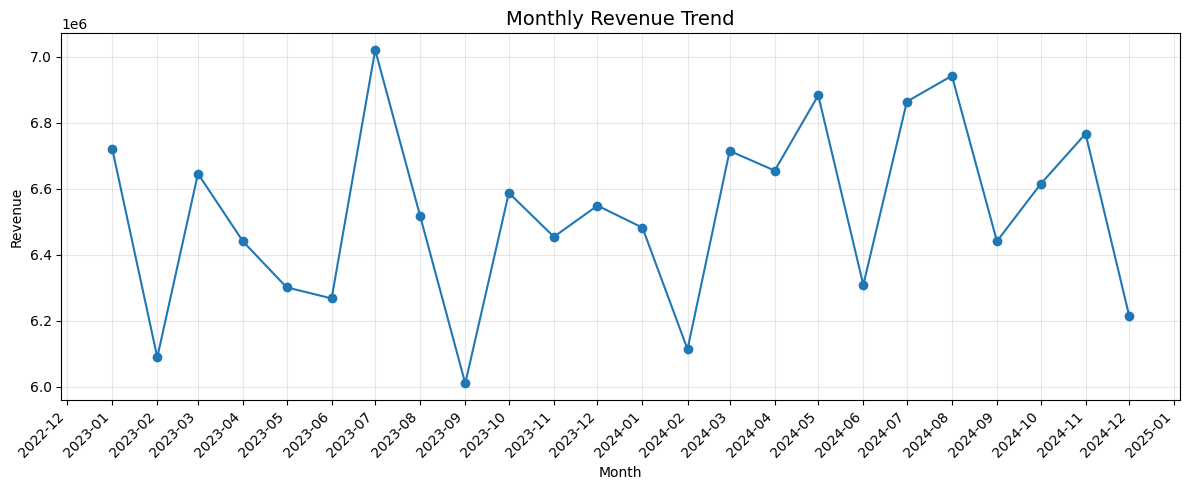

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Query monthly revenue
monthly = pd.read_sql_query("""
    SELECT OrderMonth, SUM(Revenue) AS MonthlyRevenue
    FROM transactions
    GROUP BY OrderMonth
    ORDER BY OrderMonth;
""", conn)

# Ensure OrderMonth is datetime (pandas may return object)
monthly['OrderMonth'] = pd.to_datetime(monthly['OrderMonth'])

# Plot with nicer date formatting
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(monthly['OrderMonth'], monthly['MonthlyRevenue'], marker='o', linewidth=1.5)

# Format ticks: show every 1 month (or every 2 months if labels still crowded)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))         # use interval=2 to reduce labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))         # show "2023-02"

# Rotate labels and tighten layout
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title("Monthly Revenue Trend", fontsize=14)
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
ax.grid(alpha=0.3)
fig.tight_layout()
plt.show()


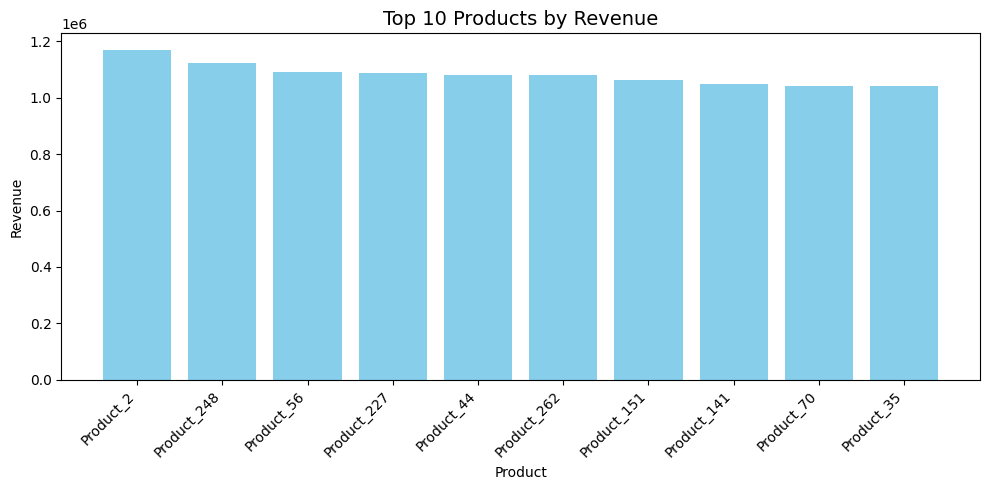

,ProductID,ProductName,TotalRevenue
0,P0002,Product_2,1170390.10
1,P0248,Product_248,1122930.81
2,P0056,Product_56,1091194.82
3,P0227,Product_227,1086381.36
4,P0044,Product_44,1082070.00
5,P0262,Product_262,1081320.24
6,P0151,Product_151,1064458.20
7,P0141,Product_141,1048786.86
8,P0070,Product_70,1042384.64
9,P0035,Product_35,1040600.99


In [9]:
# Query top 10 products by revenue
top_products = pd.read_sql_query("""
    SELECT ProductID, ProductName, SUM(Revenue) AS TotalRevenue
    FROM transactions
    GROUP BY ProductID, ProductName
    ORDER BY TotalRevenue DESC
    LIMIT 10;
""", conn)

# Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(top_products["ProductName"], top_products["TotalRevenue"], color="skyblue")
plt.title("Top 10 Products by Revenue", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top_products


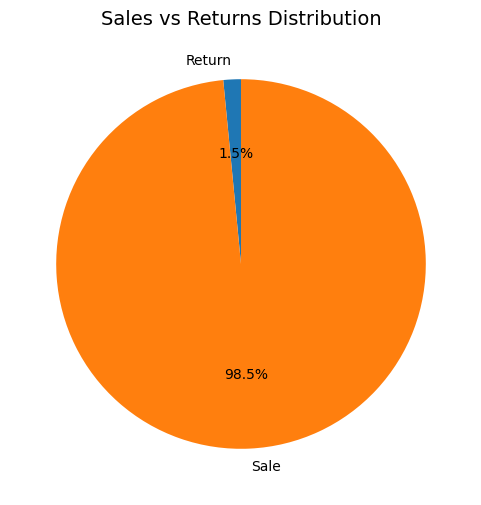

,Type,Count
0,Return,767
1,Sale,49233


In [10]:
# Query returns and sales counts
returns_data = pd.read_sql_query("""
    SELECT 
        CASE WHEN Quantity < 0 THEN 'Return' ELSE 'Sale' END AS Type,
        COUNT(*) AS Count
    FROM transactions
    GROUP BY Type;
""", conn)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(returns_data["Count"], labels=returns_data["Type"], autopct="%1.1f%%", startangle=90)
plt.title("Sales vs Returns Distribution", fontsize=14)
plt.show()

returns_data


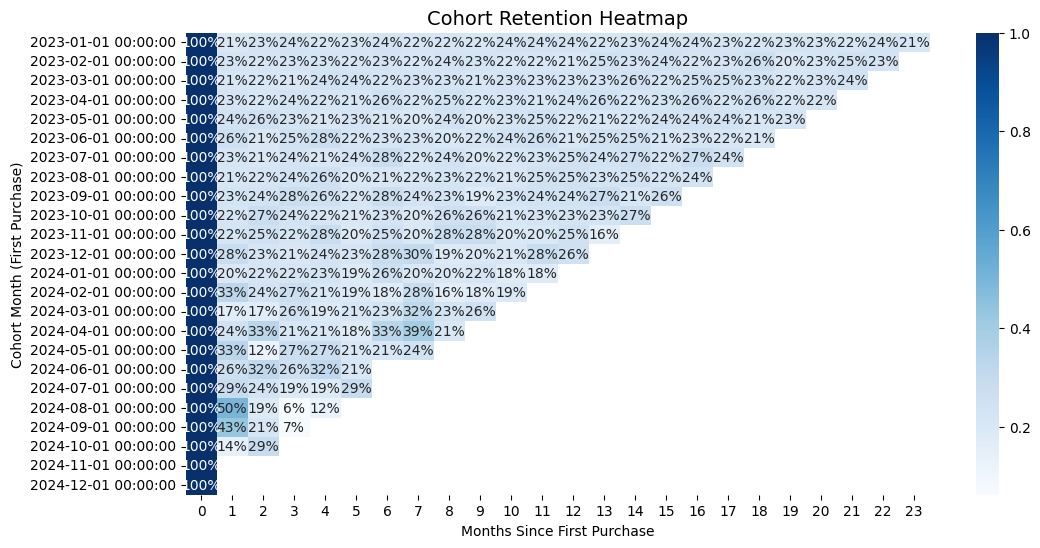

In [12]:
import numpy as np

# Get each customer's first purchase month
first_purchase = pd.read_sql_query("""
    SELECT CustomerID, MIN(OrderMonth) as CohortMonth
    FROM transactions
    GROUP BY CustomerID;
""", conn)

# Merge cohort info with transactions
cohort_df = pd.read_sql_query("""
    SELECT CustomerID, OrderMonth
    FROM transactions;
""", conn).merge(first_purchase, on="CustomerID")

# Compute cohort index (months since first purchase)
cohort_df["CohortIndex"] = (
    (pd.to_datetime(cohort_df["OrderMonth"]).dt.year - pd.to_datetime(cohort_df["CohortMonth"]).dt.year) * 12
    + (pd.to_datetime(cohort_df["OrderMonth"]).dt.month - pd.to_datetime(cohort_df["CohortMonth"]).dt.month)
)

# Count unique customers per cohort and index
grouped = cohort_df.groupby(["CohortMonth","CohortIndex"])["CustomerID"].nunique().reset_index()

# Pivot into matrix
cohort_pivot = grouped.pivot(index="CohortMonth", columns="CohortIndex", values="CustomerID")

# Divide by cohort size to get retention rate
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Cohort Retention Heatmap", fontsize=14)
plt.ylabel("Cohort Month (First Purchase)")
plt.xlabel("Months Since First Purchase")
plt.show()


Snapshot date: 2024-12-31
RFM table saved to ../data/rfm_segments.csv

RFM sample (top 8 rows):


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RF_Score,Segment
7940,C8963,13,12,33080.61,5,5,5,555,55,Champions
5,C1005,20,10,39356.61,5,5,5,555,55,Champions
3449,C4460,2,11,28766.29,5,5,5,555,55,Champions
3454,C4465,7,9,33980.86,5,5,5,555,55,Champions
3443,C4454,18,10,45996.02,5,5,5,555,55,Champions
1170,C2172,12,9,30282.02,5,5,5,555,55,Champions
6602,C7622,5,11,30354.83,5,5,5,555,55,Champions
1095,C2097,19,11,30775.93,5,5,5,555,55,Champions



Segment counts:


,Count
Segment,
Potential,1861
At Risk / Lost,1737
Champions,1667
Needs Attention,1215
Big Spenders,851
Loyal,646


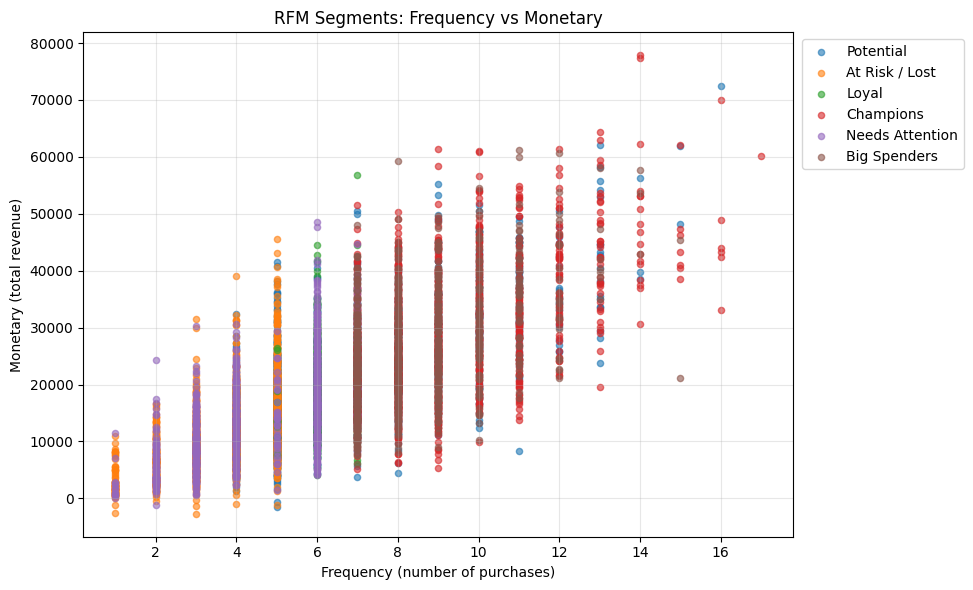

,Count,MedianRecency,MedianFrequency,MedianMonetary,TotalMonetary
Segment,,,,,
Potential,1861,71.0,6.0,18801.70,37848747.93
At Risk / Lost,1737,223.0,4.0,10808.78,20161081.10
Champions,1667,26.0,8.0,26365.37,46221656.44
Needs Attention,1215,104.0,4.0,13626.79,17732529.08
Big Spenders,851,155.0,8.0,24254.68,22019373.46
Loyal,646,28.0,6.0,18899.24,12614403.61


In [14]:
# ---------- RFM Analysis (Recency, Frequency, Monetary) ----------
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load transactions (we only need key columns)
tx = pd.read_sql_query("SELECT CustomerID, OrderDate, InvoiceNo, Revenue FROM transactions;", conn)
tx['OrderDate'] = pd.to_datetime(tx['OrderDate'])

# 2) Snapshot date (one day after the last order in dataset)
snapshot_date = tx['OrderDate'].max() + pd.Timedelta(days=1)
print("Snapshot date:", snapshot_date.date())

# 3) Compute R, F, M for each customer
rfm = tx.groupby('CustomerID').agg({
    'OrderDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'Revenue': 'sum'                                        # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

# 4) Score R,F,M on 1-5 scale (5 = best)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_rank'] = rfm['Frequency'].rank(method='first')
rfm['F_score'] = pd.qcut(rfm['F_rank'], 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# 5) Combined RFM score and RF score
rfm['RFM_Score'] = rfm['R_score']*100 + rfm['F_score']*10 + rfm['M_score']
rfm['RF_Score'] = rfm['R_score']*10 + rfm['F_score']

# 6) Segment labeling
def segment_label(row):
    r, f = row['R_score'], row['F_score']
    if r >= 4 and f >= 4:
        return 'Champions'
    if r >= 4 and f >= 3:
        return 'Loyal'
    if r >= 3 and f >= 2:
        return 'Potential'
    if r <= 2 and f >= 4:
        return 'Big Spenders'
    if r <= 2 and f <= 2:
        return 'At Risk / Lost'
    return 'Needs Attention'

rfm['Segment'] = rfm.apply(segment_label, axis=1)

# 7) Save results into project data folder
rfm = rfm.drop(columns=['F_rank'])  # cleanup
rfm.to_csv("../data/rfm_segments.csv", index=False)
print("RFM table saved to ../data/rfm_segments.csv")

# 8) Show top & bottom customers
print("\nRFM sample (top 8 rows):")
display(rfm.sort_values('RFM_Score', ascending=False).head(8))

print("\nSegment counts:")
display(rfm['Segment'].value_counts().to_frame('Count'))

# 9) Scatter plot: Frequency vs Monetary colored by Segment
plt.figure(figsize=(10,6))
segments = rfm['Segment'].unique()
colors = plt.cm.tab10.colors
for i, seg in enumerate(segments):
    sub = rfm[rfm['Segment']==seg]
    plt.scatter(sub['Frequency'], sub['Monetary'], s=20, alpha=0.6, label=seg, color=colors[i % len(colors)])

plt.xlabel('Frequency (number of purchases)')
plt.ylabel('Monetary (total revenue)')
plt.title('RFM Segments: Frequency vs Monetary')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 10) Segment summary (interview-ready talking points)
seg_summary = rfm.groupby('Segment').agg({
    'CustomerID':'count',
    'Recency':'median',
    'Frequency':'median',
    'Monetary':['median','sum']
}).round(2)
seg_summary.columns = ['Count','MedianRecency','MedianFrequency','MedianMonetary','TotalMonetary']
display(seg_summary.sort_values('Count', ascending=False))
